In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.colors as colors


from datetime import datetime,timezone 

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [3]:
### Function to plot basemap and lon lat labels ###
def plot_background(ax):
    ax.add_feature(cf.LAKES.with_scale('10m'),facecolor='none', edgecolor='black',linewidth=0.8)
    ax.add_feature(cf.COASTLINE.with_scale('10m'),facecolor='none', edgecolor='black', linewidth=1) 
    return ax

def plot_ticks(ax):
    ax.set_yticks(np.arange(5, 22, 5), crs=ccrs.PlateCarree())
    ax.set_xticks(np.arange(115, 127, 5), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    return ax

In [4]:
from matplotlib.colors import LinearSegmentedColormap


color_dict1 = {'skyblue': '#3498DB',
               'green1': '#7CFC00',
               'red1' : '#E74C3C',
               'yellow1' : '#F6F91A',
               'violet1' : '#8E44AD',
               'orange1' : '#FFBF00',
               'pink1': '#FFC0CB',
               'cornsilk': '#FFF8DC',
               'gray' : '#808080'
               }

mycolorbar1 = LinearSegmentedColormap.from_list('mycolorbar1', [
    color_dict1['skyblue'],
    color_dict1['green1'],
    color_dict1['red1'],
    color_dict1['yellow1'],
    color_dict1['violet1']])

'''
    color_dict1['orange1'],
    color_dict1['pink1'],
    color_dict1['cornsilk'],
    color_dict1['gray']'''

"\n    color_dict1['orange1'],\n    color_dict1['pink1'],\n    color_dict1['cornsilk'],\n    color_dict1['gray']"

In [36]:
df = pd.read_csv('pa_clusters_all_withTC.csv')
df.loc[ df["cluster_3"] == 1, "cluster3"] = 2
df.loc[ df["cluster_3"] == 2, "cluster3"] = 1
df.loc[ df["cluster_3"] == 3, "cluster3"] = 3
df = df[df['cluster_3'] >= 0]
df['cluster3'] = df['cluster3'].astype(int)
df['cluster_3'] = df['cluster3']


In [37]:
df = pd.melt(df, id_vars=['lon','lat','cluster_2', 'cluster_3',
       'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8',
       'cluster_9'], value_vars=['2013-05-01 00:00:00',
       '2013-05-01 01:00:00', '2013-05-01 02:00:00', '2013-05-01 03:00:00',
       '2013-05-01 04:00:00', '2013-05-01 05:00:00', '2013-05-01 06:00:00',
       '2013-05-01 07:00:00', '2013-05-01 08:00:00', '2013-05-01 09:00:00',
       '2013-05-01 10:00:00', '2013-05-01 11:00:00', '2013-05-01 12:00:00',
       '2013-05-01 13:00:00', '2013-05-01 14:00:00', '2013-05-01 15:00:00',
       '2013-05-01 16:00:00', '2013-05-01 17:00:00', '2013-05-01 18:00:00',
       '2013-05-01 19:00:00', '2013-05-01 20:00:00', '2013-05-01 21:00:00',
       '2013-05-01 22:00:00', '2013-05-01 23:00:00'])
df['time'] = pd.to_datetime(df.variable)
df['hr'] = df['time'].dt.hour


In [38]:
sum_2 = df.groupby(['cluster_2','hr']).agg({'value': ['mean', 'max', 'min','std', 'count']}).droplevel(axis=1, level=0).reset_index()
sum_3 = df.groupby(['cluster_3','hr']).agg({'value': ['mean', 'max', 'min','std', 'count']}).droplevel(axis=1, level=0).reset_index()
sum_4 = df.groupby(['cluster_4','hr']).agg({'value': ['mean', 'max', 'min','std', 'count']}).droplevel(axis=1, level=0).reset_index()
sum_5 = df.groupby(['cluster_5','hr']).agg({'value': ['mean', 'max', 'min','std', 'count']}).droplevel(axis=1, level=0).reset_index()

In [39]:
sum_3.to_csv('pa_clusters_peaks_TC_3.csv')
sum_3.max()

cluster_3      3.000000
hr            23.000000
mean           2.011914
max            3.465571
min            1.086360
std            0.430150
count        273.000000
dtype: float64

In [40]:
df[(df['hr'] == 0) & (df['cluster_3'] == 1)].count() #183

lon          273
lat          273
cluster_2    273
cluster_3    273
cluster_4    273
cluster_5    273
cluster_6    273
cluster_7    273
cluster_8    273
cluster_9    273
variable     273
value        273
time         273
hr           273
dtype: int64

In [41]:
df[(df['hr'] == 0) & (df['cluster_3'] == 2)].count() #273

lon          183
lat          183
cluster_2    183
cluster_3    183
cluster_4    183
cluster_5    183
cluster_6    183
cluster_7    183
cluster_8    183
cluster_9    183
variable     183
value        183
time         183
hr           183
dtype: int64

In [42]:
df[(df['hr'] == 0) & (df['cluster_3'] == 3)].count() #174

lon          174
lat          174
cluster_2    174
cluster_3    174
cluster_4    174
cluster_5    174
cluster_6    174
cluster_7    174
cluster_8    174
cluster_9    174
variable     174
value        174
time         174
hr           174
dtype: int64

In [43]:
100*183/(183+273+174)

29.047619047619047

In [44]:
100*273/(183+273+174)

43.333333333333336

In [45]:
100*174/(183+273+174)

27.61904761904762

In [46]:
29+43+28

100

lon          183
lat          183
cluster_2    183
cluster_3    183
cluster_4    183
cluster_5    183
cluster_6    183
cluster_7    183
cluster_8    183
cluster_9    183
variable     183
value        183
time         183
hr           183
dtype: int64
lon          174
lat          174
cluster_2    174
cluster_3    174
cluster_4    174
cluster_5    174
cluster_6    174
cluster_7    174
cluster_8    174
cluster_9    174
variable     174
value        174
time         174
hr           174
dtype: int64


/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_1386/1268629057.py:118: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{images_dir}/pa_cluster_withTC_3.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")


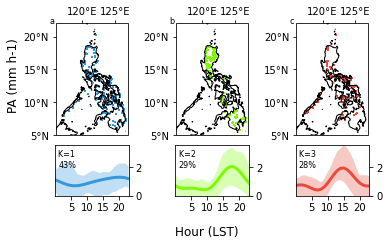

In [47]:
mycolorbar1 = LinearSegmentedColormap.from_list('mycolorbar1', [
    color_dict1['skyblue'],color_dict1['green1'],color_dict1['red1'],color_dict1['skyblue']])
                                               


s = 1
fig = plt.figure(figsize=(8.5,11))
gs = fig.add_gridspec(10, 12)


ax1 = fig.add_subplot(gs[0:2, 0:2], projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[0:2, 3:5], projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[0:2, 6:8], projection=ccrs.PlateCarree())
ax11 = fig.add_subplot(gs[2, 0:2])
ax22 = fig.add_subplot(gs[2, 3:5])
ax33 = fig.add_subplot(gs[2, 6:8])

plot_background(ax1)
plot_ticks(ax1)
plot_background(ax2)
plot_ticks(ax2)
plot_background(ax3)
plot_ticks(ax3)


cmap = mycolorbar1
bounds = np.arange(0.5,5,1)
norm = colors.BoundaryNorm(bounds,cmap.N)  


t = df[df['cluster_3']== 1]
cs = ax1.scatter(t['lon'], t['lat'], c='#3498DB', s=s, marker="s", transform=ccrs.PlateCarree())
ax1.set_xlim(116,127)
ax1.set_ylim(5,22)
ax1.xaxis.tick_top()
ax1.text(115, 22, 'a',  fontsize=8)

t = df[df['cluster_3']== 2]
print(t[(t['hr'] == 0)].count() )
cs = ax2.scatter(t['lon'], t['lat'], c='#7CFC00', s=s, marker="s", transform=ccrs.PlateCarree())
ax2.set_xlim(116,127)
ax2.set_ylim(5,22)
ax2.xaxis.tick_top()
ax2.text(115, 22, 'b',  fontsize=8)

t = df[df['cluster_3']== 3]
print(t[(t['hr'] == 0)].count() )
cs = ax3.scatter(t['lon'], t['lat'], c='#E74C3C', s=s, marker="s", transform=ccrs.PlateCarree())
ax3.set_xlim(116,127)
ax3.set_ylim(5,22)
ax3.xaxis.tick_top()
ax3.text(115, 22, 'c',  fontsize=8)



################################################################
s = sum_3[sum_3['cluster_3'] == 1]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
max_ = s['max']
min_ = s['min']
ax11.plot(t, mu1, lw=3, label='opaque', color='#3498DB')
ax11.fill_between(t, min_, max_, facecolor='#3498DB', alpha=0.3)
ax11.yaxis.tick_right() 
ax11.text(1, 2., 'K=1 \n43%',  fontsize=8)
#ax11.text(-1.7, 1.8, 'c',  fontsize=8)
################################################################
s = sum_3[sum_3['cluster_3'] == 2]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
max_ = s['max']
min_ = s['min']
ax22.plot(t, mu1, lw=3, label='opaque', color='#7CFC00')
ax22.fill_between(t, min_, max_, facecolor='#7CFC00', alpha=0.3)
ax22.yaxis.tick_right() 
ax22.text(1, 2., 'K=2 \n29%', fontsize=8)
#ax22.text(-1.7, 2, 'b',  fontsize=8)
################################################################
s = sum_3[sum_3['cluster_3'] == 3]
t = s['hr']
mu1 = s['mean']
max_ = s['mean']+ s['std']
min_ = s['mean']-s['std']
max_ = s['max']
min_ = s['min']
ax33.plot(t, mu1, lw=3, label='opaque', color='#E74C3C')
ax33.fill_between(t, min_, max_, facecolor='#E74C3C', alpha=0.3)
ax33.yaxis.tick_right() 
ax33.text(1, 2., 'K=3 \n28%',  fontsize=8)
#ax33.text(-1.7, 1.8, 'c',  fontsize=8)
################################################################

################################################################
ax11.set_xlim(0,23)
ax11.set_ylim(0,3.5)
ax22.set_xlim(0,23)
ax22.set_ylim(0,3.5)
ax33.set_xlim(0,23)
ax33.set_ylim(0,3.5)
ax11.set_xticks([5,10,15,20])
ax22.set_xticks([5,10,15,20])
ax33.set_xticks([5,10,15,20])
ax11.text(-15, 6, 'PA (mm h-1)', rotation=90, fontsize=12)
ax22.text(0, -2.7, 'Hour (LST)', fontsize=12)
################################################################
#ax1.text(128, 15, 'PA (mm h-1)', rotation=90, fontsize=12)
#ax1.text(128, 6, 'PA (mm h-1)', rotation=90, fontsize=12)


#ax11.text(8, -1.8, 'Hour (LST)', fontsize=12)
#plt.text(-3, 0.67, 'Cluster Number', rotation=90, fontsize=15)

images_dir = 'Images'
plt.savefig(f"{images_dir}/pa_cluster_withTC_3.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")
